## hyao66: Assignment 4
### problem 2: Forest Management Problem with Policy Iteration, Value Iteration and Q learning

In [1]:
#Reference
#https://miat.inrae.fr/MDPtoolbox/QuickStart.pdf
#https://pymdptoolbox.readthedocs.io/en/latest/api/example.html

import numpy as np
import mdptoolbox
import mdptoolbox.example
# from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# CREATE A FOREST MANAGEMENT PROBLEM
# P, transition probability (A x S x S)
# R, reward matrix (S X A)
firerate=0.05 # probability of having a fire
discount=0.8 # discount rate for the future value
# 0 means more importance is given to immediate rewards.
# 1 means more importance is given to future rewards.
P, R = mdptoolbox.example.forest(S=3000, # The number of states, an integer greater than 1.
r1=10, # the reward when forest is in its oldest state and action 'Wait' to be performed
r2=5, # the reward when forest is in its oldest state and action 'Cut' to be performed
p=firerate, # the probability of wild fire occurence, in range(0,1).
is_sparse=False)

#%%
# solving the problem using value iteartion
print('This is my value iteartions \n')
vi = mdptoolbox.mdp.ValueIteration(P, R, discount=discount)
vi.run()
print('Discount rate: ', vi.discount)
print('fire rate:', firerate)
print('Iterations until converge: ', vi.iter,'\n')
print('Optimal policy: ', vi.policy, '\n')
print('Expected Reward in each state: ', vi.V,'\n')
print('Elapse time: ', vi.time)

This is my value iteartions 

Discount rate:  0.8
fire rate: 0.05
Iterations until converge:  31 

Optimal policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
firerates = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5,0.4, 0.3,0.2]
duration = []
iteration = []
rewards = []
# average_scores = []
policy = []
wait_action_rate = []

for a_firerate in firerates:

    firerate=a_firerate # probability of having a fire
    discount=0.8

    P, R = mdptoolbox.example.forest(S=3000, # The number of states, an integer greater than 1.
    r1=10, # the reward when forest is in its oldest state and action 'Wait' to be performed
    r2=5, # the reward when forest is in its oldest state and action 'Cut' to be performed
    p=firerate, # the probability of wild fire occurence, in range(0,1).
    is_sparse=False)

    vi = mdptoolbox.mdp.PolicyIteration(P, R, discount=discount)
    vi.run()

    policy_return = vi.policy
    runtime = vi.time
    
    duration.append(runtime)
    policy.append(policy_return)
    
    rate = np.unique(policy_return, return_counts=True)[1][0]/3000
    wait_action_rate.append(rate)
    
    cumul = np.sum(vi.V)
    rewards.append(cumul)
    
    iteration.append(vi.iter)

In [4]:
duration

[0.4127490520477295,
 0.3250999450683594,
 0.57334303855896,
 0.6321079730987549,
 0.8967969417572021,
 0.8809819221496582,
 1.1654291152954102,
 1.471228837966919,
 2.050861120223999]

In [5]:
wait_action_rate

[0.0006666666666666666,
 0.0006666666666666666,
 0.001,
 0.001,
 0.0013333333333333333,
 0.0013333333333333333,
 0.0016666666666666668,
 0.002,
 0.0026666666666666666]

In [6]:
rewards

[3103.3266129032236,
 3897.8260869565256,
 4666.067323481117,
 5335.967741935494,
 5925.9087344028585,
 6450.285714285702,
 6921.037787941787,
 7348.575103403261,
 7744.227644027494]

In [7]:
firerates = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5,0.4, 0.3,0.2]
duration2 = []
iteration2 = []
rewards2 = []
# average_scores = []
policy2 = []
wait_action_rate2 = []

for a_firerate in firerates:

    firerate=a_firerate # probability of having a fire
    discount=0.8

    P, R = mdptoolbox.example.forest(S=3000, # The number of states, an integer greater than 1.
    r1=10, # the reward when forest is in its oldest state and action 'Wait' to be performed
    r2=5, # the reward when forest is in its oldest state and action 'Cut' to be performed
    p=firerate, # the probability of wild fire occurence, in range(0,1).
    is_sparse=False)

    vi = mdptoolbox.mdp.ValueIteration(P, R, discount=discount)
    vi.run()

    policy_return = vi.policy
    runtime = vi.time
    
    duration2.append(runtime)
    policy2.append(policy_return)
    
    rate = np.unique(policy_return, return_counts=True)[1][0]/3000
    wait_action_rate2.append(rate)
    
    cumul = np.sum(vi.V)
    rewards2.append(cumul)
    
    iteration2.append(vi.iter)

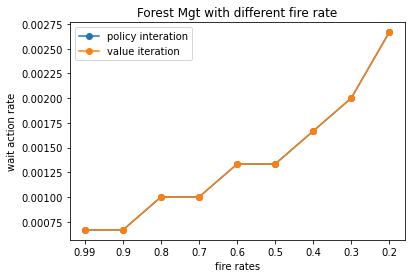

In [8]:
plt.figure()
plt.plot(wait_action_rate, marker='o')
plt.plot(wait_action_rate2, marker='o')
plt.ylabel('wait action rate')
plt.title('Forest Mgt with different fire rate')
plt.xlabel('fire rates')
plt.xticks(range(len(firerates)), firerates)
plt.legend(['policy interation', 'value iteration'])

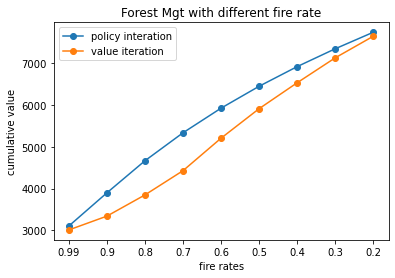

In [9]:
plt.figure()
plt.plot(rewards, marker='o')
plt.plot(rewards2, marker='o')
plt.ylabel('cumulative value')
plt.title('Forest Mgt with different fire rate')
plt.xlabel('fire rates')
plt.xticks(range(len(firerates)), firerates)
plt.legend(['policy interation', 'value iteration'])

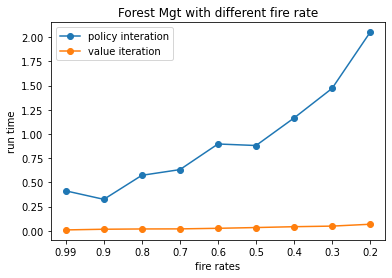

In [10]:
plt.figure()
plt.plot(duration, marker='o')
plt.plot(duration2, marker='o')
plt.ylabel('run time')
plt.title('Forest Mgt with different fire rate')
plt.xlabel('fire rates')
plt.xticks(range(len(firerates)), firerates)
plt.legend(['policy interation', 'value iteration'])

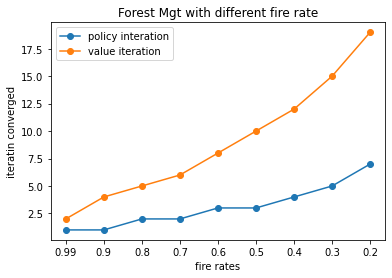

In [11]:
plt.figure()
plt.plot(iteration, marker='o')
plt.plot(iteration2, marker='o')
plt.ylabel('iteratin converged')
plt.title('Forest Mgt with different fire rate')
plt.xlabel('fire rates')
plt.xticks(range(len(firerates)), firerates)
plt.legend(['policy interation', 'value iteration'])

In [16]:
firerate = 0.2
discounts = [0.99, 0.98, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5]
duration = []
iteration = []
rewards = []
# average_scores = []
policy = []
wait_action_rate = []

for a_discount in discounts:

#     firerate=firerate # probability of having a fire
#     discount = a_discount

    P, R = mdptoolbox.example.forest(S=3000, # The number of states, an integer greater than 1.
    r1=10, # the reward when forest is in its oldest state and action 'Wait' to be performed
    r2=5, # the reward when forest is in its oldest state and action 'Cut' to be performed
    p=firerate, # the probability of wild fire occurence, in range(0,1).
    is_sparse=False)

    vi = mdptoolbox.mdp.PolicyIteration(P, R, discount=a_discount)
    vi.run()

    policy_return = vi.policy
    runtime = vi.time
    
    duration.append(runtime)
    policy.append(policy_return)
    
    rate = np.unique(policy_return, return_counts=True)[1][0]/3000
    wait_action_rate.append(rate)
    
    cumul = np.sum(vi.V)
    rewards.append(cumul)
    
    iteration.append(vi.iter)

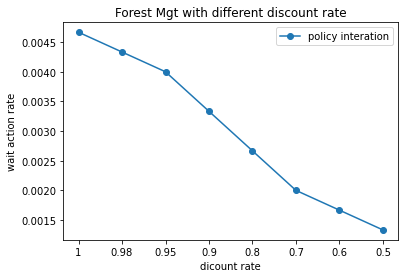

In [18]:
plt.figure()
plt.plot(wait_action_rate, marker='o')
plt.ylabel('wait action rate')
plt.title('Forest Mgt with different discount rate')
plt.xlabel('dicount rate')
plt.xticks(range(len(dicounts)), dicounts)
plt.legend(['policy interation'])

In [20]:
firerate = 0.2
discounts = 0.9
iteration = [10000, 1000000, 10000000, 50000000, 100000000]
duration = []
# iteration = []
rewards = []
# average_scores = []
policy = []
wait_action_rate = []

for a_iter in iteration:

#     firerate=firerate # probability of having a fire
#     discount = a_discount

    P, R = mdptoolbox.example.forest(S=3000, # The number of states, an integer greater than 1.
    r1=10, # the reward when forest is in its oldest state and action 'Wait' to be performed
    r2=5, # the reward when forest is in its oldest state and action 'Cut' to be performed
    p=firerate, # the probability of wild fire occurence, in range(0,1).
    is_sparse=False)

    vi = mdptoolbox.mdp.QLearning(P, R, discount=discount, n_iter=a_iter)
    vi.run()

    policy_return = vi.policy
    runtime = vi.time
    
    duration.append(runtime)
    policy.append(policy_return)
    
    rate = np.unique(policy_return, return_counts=True)[1][0]/3000
    wait_action_rate.append(rate)
    
    cumul = np.sum(vi.V)
    rewards.append(cumul)
    
#     iteration.append(vi.iter)

In [21]:
rewards

[137.63640826337723,
 5101.319371470197,
 43209.25470541467,
 205001.1770207689,
 400060.0172087765]

In [22]:
duration

[0.473297119140625,
 40.41098093986511,
 367.70340394973755,
 1830.6987869739532,
 3699.7116479873657]

In [23]:
wait_action_rate

[0.9926666666666667, 0.7663333333333333, 0.692, 0.704, 0.71]

In [30]:
400060.0172087765/100000000

0.004000600172087765

In [ ]:
vi=mdptoolbox.mdp.QLearning(P, R, discount=discount, n_iter=20000000)
vi.run()